<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Task1_Kiran_Gyan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from scipy import stats
plt.rc("font", size=14)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
#Checking for NULL
df.isnull().values.any()

False

In [ ]:
df.shape

(100, 4)

In [ ]:
df.head()

,Unnamed: 0,x,y,label
0,0,51.446326,2647.506704,square
1,1,54.796232,3002.976783,square
2,2,55.563542,9700.699251,circle
3,3,55.448564,3073.992277,square
4,4,53.976549,2912.441066,square


In [ ]:
#Dropping first column
df=df.iloc[: , 1:]

# Distribution of Data

In [ ]:
df['label'].value_counts()

square    70
circle    30
Name: label, dtype: int64

In [ ]:
df.groupby('label').mean()

,x,y
label,,
circle,54.01800,9186.966095
square,54.88899,3020.071225


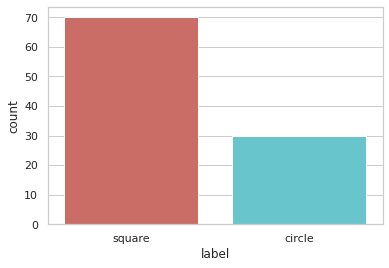

In [ ]:
sns.countplot(x='label',data=df,palette='hls')

Text(0, 0.5, 'Frequency')

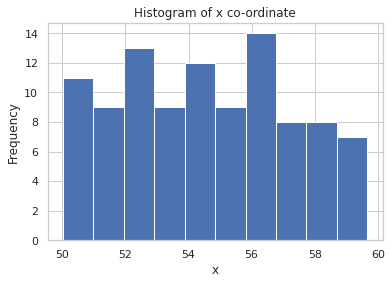

In [ ]:
df['x'].hist()
plt.title('Histogram of x co-ordinate')
plt.xlabel('x')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

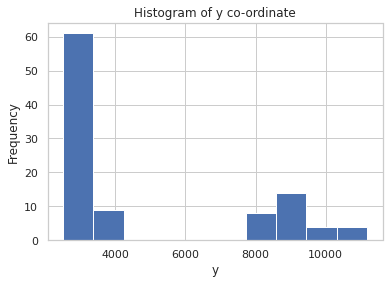

In [ ]:
df['y'].hist()
plt.title('Histogram of y co-ordinate')
plt.xlabel('y')
plt.ylabel('Frequency')

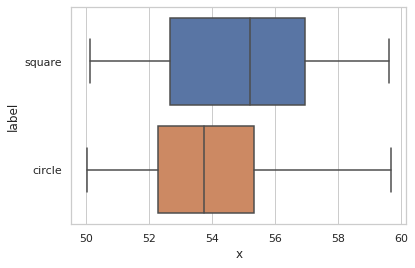

In [ ]:
sns.boxplot(x = 'x', y = 'label', data = df)

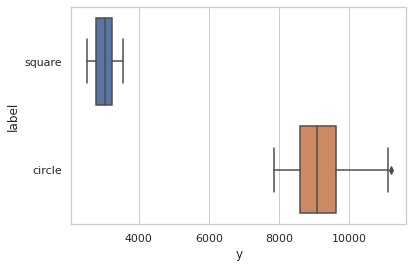

In [ ]:
sns.boxplot(x = 'y', y = 'label', data = df)

In [ ]:
df['label']=np.where(df['label']=="square",1,0)

In [ ]:
#Outlier removal
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
df.shape

(100, 3)

#Modelling

In [ ]:
X = df.loc[:, df.columns != 'label']
Y = df.loc[:, df.columns == 'label']
Y=Y['label'].to_numpy()

In [ ]:
#Building a classification model
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
glm=logreg.fit(X_train, Y_train)
print(glm)

LogisticRegression()


In [ ]:
Y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_val, Y_val)))

Accuracy of logistic regression classifier on validation set: 1.00


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix = confusion_matrix(Y_val, Y_pred)
print(confusion_matrix)
print(classification_report(Y_val, Y_pred))

[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Prediction on Test Dataset

In [ ]:
#Prediction of Inference or Test dataset
test_data=pd.read_csv("test.csv")

In [ ]:
test_data.shape

(20, 3)

In [ ]:
test_data.head()

,Unnamed: 0,x,y
0,0,55.794005,3111.674104
1,1,57.736651,3332.636691
2,2,50.157526,2515.483434
3,3,54.871332,3010.035848
4,4,50.251338,2524.648947


In [ ]:
test_data=test_data.iloc[:,1:]

In [ ]:
#Prediction on Test dataset
prediction=logreg.predict(test_data)

In [ ]:
test_data['label']=np.where(prediction==1,"square","circle")

In [ ]:
test_data.head(12)

,x,y,label
0,55.794005,3111.674104,square
1,57.736651,3332.636691,square
2,50.157526,2515.483434,square
3,54.871332,3010.035848,square
4,50.251338,2524.648947,square
5,54.865062,3009.934703,square
6,58.179744,3382.579734,square
7,54.582965,2980.194875,square
8,55.302249,3057.323992,square
9,50.741562,2573.531839,square


In [ ]:
test_data.to_csv("test_data_predictions.csv")

# Calculating Geometric Meaning from input parameters

In [ ]:
from scipy.stats.mstats import gmean
print(glm.coef_,glm.intercept_)
#intercept & Co-efficients are the input parameters 
inp_param=abs(np.append(glm.coef_[0],glm.intercept_))
print(inp_param)
print(gmean(inp_param))

[[ 0.32330857 -0.00297575]] [0.0058402]
[0.32330857 0.00297575 0.0058402 ]
0.017777906585423765
